In [1]:
import plotly_express as px
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import math
data = pd.read_csv('weco.csv')

2(a)

In [17]:
data['JT_Months'] = (data['job_tenure']/60).round(2)
data = data.loc[data['JT_Months']>6]
data['Profit ($)'] = ((data.JT_Months-6)*30)*100
data

,sex,dex,lex,quit,job_tenure,status,JT_Months,Profit ($)
2,1,45,12.0,0,410,1,6.83,2490.0
5,0,38,12.0,0,517,1,8.62,7860.0
10,0,55,12.0,0,387,0,6.45,1350.0
11,1,45,12.0,0,469,1,7.82,5460.0
14,1,36,11.0,0,382,1,6.37,1110.0
...,...,...,...,...,...,...,...,...
662,1,41,12.0,0,479,1,7.98,5940.0
664,0,53,13.0,0,617,1,10.28,12840.0
672,0,53,12.0,0,562,0,9.37,10110.0
675,0,52,12.0,0,580,0,9.67,11010.0


In [18]:
px.scatter(data,x=data['dex'],y=data['Profit ($)'])

Using the Gaussian kernel for profit estimation

In [19]:
class GaussianKernel_ndim:
    def __init__(self,x,y,b):
        self.x = np.array(x)
        self.y = np.array(y)
        self.b = np.array(b)
        
        
        # implementing the gaussian kernel
    def gk(self, z):
        return(1/math.sqrt(2*math.pi))*math.exp(-0.5*z**2)
        
        # calculating weights for prediction
    def predict(self,X):
        if len(X)==1:
            kernels = np.array([self.gk((np.linalg.norm(xi-X))/self.b) for xi in self.x])
            weights = np.array([len(self.x)* (kernel/np.sum(kernels)) for kernel in kernels])
            return np.dot(weights.T, self.y)/len(self.x)
        else:
            out = []
            for ele in X:
                kernels = np.array([self.gk((np.linalg.norm(xi-ele))/self.b) for xi in self.x])
                weights = np.array([len(self.x)* (kernel/np.sum(kernels)) for kernel in kernels])
                out.append(np.dot(weights.T, self.y)/len(self.x))
            return out

In [20]:
x = np.array(data['dex'])
y = np.array(data['Profit ($)'])

In [21]:
model = GaussianKernel_ndim(x,y,3)
woThreshold = model.predict(x)

2(b)

In [22]:
Threshold = data.loc[data['dex']>50]
Threshold

,sex,dex,lex,quit,job_tenure,status,JT_Months,Profit ($)
10,0,55,12.0,0,387,0,6.45,1350.0
18,0,54,11.0,0,928,1,15.47,28410.0
21,1,58,12.0,0,573,0,9.55,10650.0
26,1,51,12.0,0,920,1,15.33,27990.0
36,1,57,12.0,0,956,0,15.93,29790.0
...,...,...,...,...,...,...,...,...
650,1,53,12.0,0,1163,0,19.38,40140.0
664,0,53,13.0,0,617,1,10.28,12840.0
672,0,53,12.0,0,562,0,9.37,10110.0
675,0,52,12.0,0,580,0,9.67,11010.0


In [23]:
px.scatter(Threshold,x=Threshold['dex'],y=Threshold['Profit ($)'])

In [24]:
a = np.array(Threshold['dex'])
b = np.array(Threshold['Profit ($)'])

In [25]:
model = GaussianKernel_ndim(a,b,3)
wThreshold = model.predict(a)

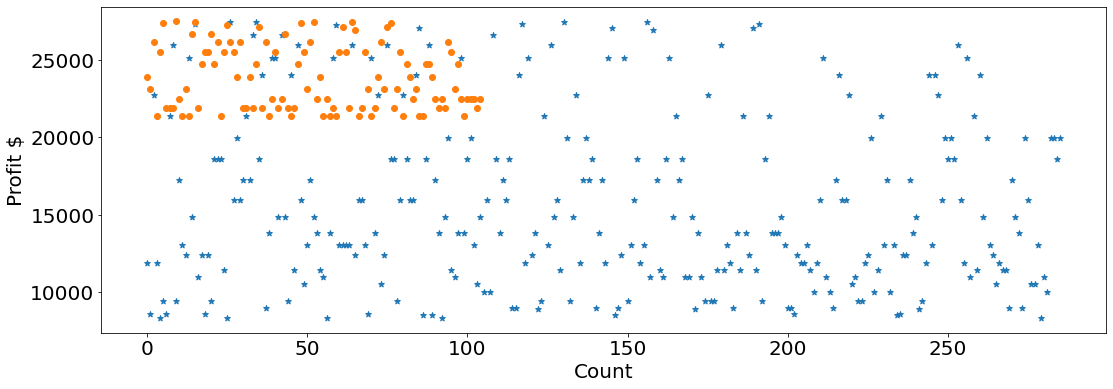

In [28]:
plt.rcParams['figure.figsize'] = (18,6)
plt.scatter(range(len(woThreshold)),woThreshold,marker='*')
plt.scatter(range(len(wThreshold)),wThreshold)
plt.xlabel('Count')
plt.ylabel('Profit $')
plt.rcParams['font.size'] = (20)


In [30]:
data

,sex,dex,lex,quit,job_tenure,status,JT_Months,Profit ($)
2,1,45,12.0,0,410,1,6.83,2490.0
5,0,38,12.0,0,517,1,8.62,7860.0
10,0,55,12.0,0,387,0,6.45,1350.0
11,1,45,12.0,0,469,1,7.82,5460.0
14,1,36,11.0,0,382,1,6.37,1110.0
...,...,...,...,...,...,...,...,...
662,1,41,12.0,0,479,1,7.98,5940.0
664,0,53,13.0,0,617,1,10.28,12840.0
672,0,53,12.0,0,562,0,9.37,10110.0
675,0,52,12.0,0,580,0,9.67,11010.0


In [100]:
th = list(range(30,61))
cost = []
for x in th:
  
    cost.append((data.loc[data['dex']>x].shape[0])*15000)
    

In [98]:
def enc_cost(data):
    from sklearn.linear_model import LinearRegression
    th = list(range(30,61))
    cost = [(data.loc[data['dex']>x].shape[0])*15000 for x in th]
    x = np.array(th)
    y = np.array(cost)
    m = LinearRegression()
    m.fit(x.reshape(-1,1),y.reshape(-1,1))
    plt.xlabel('threshold')
    plt.ylabel('cost')
    return plt.scatter(th,cost),plt.plot(th,m.predict(x.reshape(-1,1)),color='red')
    

(<matplotlib.collections.PathCollection at 0x1f9cf54a9d0>,
 [<matplotlib.lines.Line2D at 0x1f9cf54af10>])

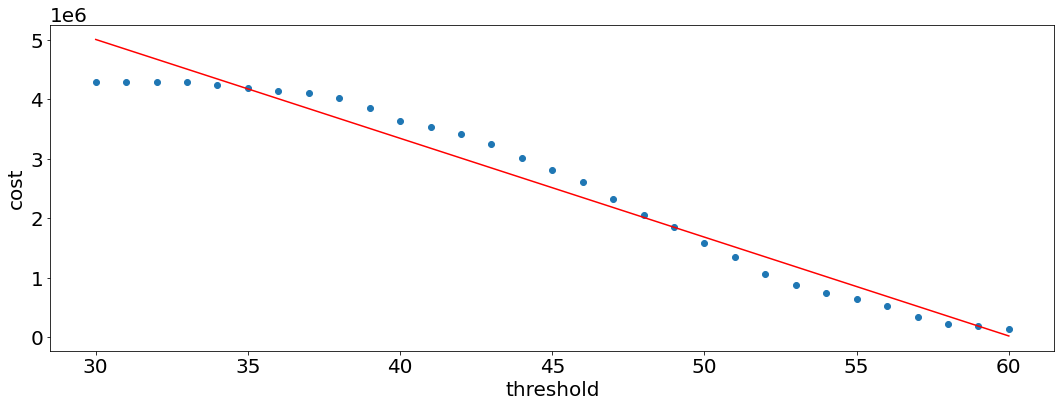

In [99]:
enc_cost(data)

In [ ]:
def cal_P(data):
    
    
    d = list(range(0,66))

    P = []
    cost = []
    people_rej = []
    for x in d:
        people_accepted = (data.loc[data['dex']>x].shape[0])
       
       
        
        p = people_accepted/len(data)
        
        P.append(p)
    for x in P:
        people_rej.append(1-x)
    for x in cal_P(data):
        cost.append(x*5000*len(data))
    
    return cost,p

Error: Session cannot generate requests

KFold cross validation

In [78]:
from sklearn.model_selection import KFold,cross_val_score
from sklearn.linear_model import LinearRegression
th = list(range(30,61))
a = np.array(Threshold['dex'])
b = np.array(Threshold['Profit ($)'])
m = LinearRegression()

cv = KFold(n_splits=5)

scores = cross_val_score(LinearRegression(),a.reshape(-1,1),b.reshape(-1,1),scoring='neg_mean_squared_error')

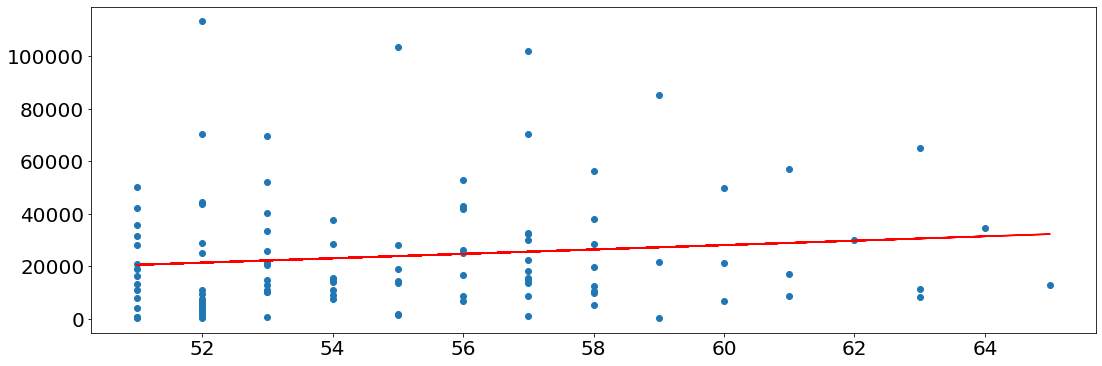

In [89]:
m.fit(a.reshape(-1,1),b.reshape(-1,1))
plt.scatter(Threshold['dex'],Threshold['Profit ($)'])
plt.plot(Threshold['dex'],m.predict(a.reshape(-1,1)),color='red')

In [79]:
scores

array([-6.30534371e+08, -3.76092405e+08, -6.14900000e+08, -6.60158390e+08,
       -3.58493525e+08])

In [74]:
from sklearn.metrics import SCORERS
print(SCORERS.keys())

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei